In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

from pydataset import data

import warnings
warnings.filterwarnings("ignore")

## Data Acquisition Exercises

### 1. Create a pandas dataframe, `df_iris`, from the iris data.

In [ ]:
df_iris = data('iris')
df_iris.info()

In [ ]:
# Print the first 3 rows

df_iris.iloc[0:3]

In [ ]:
# print the number of rows and columns(shape)

df_iris.shape

In [ ]:
# print the column names

df_iris.columns

In [ ]:
# print the summary statistics for each of the numeric variables. 
# Would you recommend rescaling the data based on these statistics?
# No, no need to rescale the data, since the four variables are in the same scale. 

df_iris.describe()

### 2. Read the `Table1_CustDetails` table from the `Excel_Exercises.xlsx` file into a dataframe named `df_excel`

In [ ]:
df_excel = pd.read_excel('/Users/mms3-pro/codeup-data-science/Spreadsheets_Exercises.xlsx')
df_excel.info()

In [ ]:
# assign the first 100 rows to a new dataframe

df_excel_sample = df_excel.head(100)
df_excel_sample.info()

In [ ]:
# print the numbers of rows of your original dataframe

df_excel.shape[0]

In [ ]:
# print first 5 column names

df_excel_sample.columns[0:5]

In [ ]:
# print the column names that have a data type of object

column_dtype = df_excel_sample.dtypes
column_dtype[column_dtype == 'object']

In [ ]:
# compute the range for each of the numeric varibales

a, b = df_excel.monthly_charges.agg(['min', 'max'])
print(f'The range of monthly charges is from {a} to {b}.')

c, d = df_excel.total_charges.agg(['min', 'max'])
print(f'The range of total charges is from {c} to {d}.')

### 3. Read the data from `this google sheet` into a dataframe, df_google

In [ ]:
G_sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
csv_export_url = G_sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_google = pd.read_csv(csv_export_url)
df_google.info()

In [ ]:
# print first 3 rows

df_google.head(3)

In [ ]:
# print the number of rows and columns

df_google.shape

In [ ]:
# print column names

df_google.columns

In [ ]:
# print data type of each column

df_google.dtypes

In [ ]:
# print the summary statistics for each of the numeric variables

df_google.describe()

In [ ]:
# print the unique values for each of your categorical variables

df_google.nunique()

In [ ]:
print(f'The unique values for Sex: {df_google.Sex.unique()}')
print(f'The unique values for Survived: {df_google.Survived.unique()}')
print(f'The unique values for Pclass: {df_google.Pclass.unique()}')
print(f'The unique values for Embarked: {df_google.Embarked.unique()}')

## Data Preparation Exercises

### 1-a. Use the function defined in `acqure.py` to load the iris data.

In [ ]:
import os
from acquire import get_iris_data

iris = get_iris_data()
iris.head()

### 1-b. Drop the `species_id` and `measurement_id` columns

In [ ]:
iris.drop(columns=['species_id','measurement_id'], inplace=True)
iris.head()

### 1-c. Rename the `species_name` column to just `species`

In [ ]:
iris.rename(columns={'species_name':'species'}, inplace=True)
iris.head()

### 1-d. Create dummy variables of the species name

In [ ]:
# select the columns you would like to be converted and make sure the returned is a dataframe

iris[['species']] # Why using double square bracket?

# Do the conversion by pd.get_dummies()

species_dummy = pd.get_dummies(iris[['species']])

# join the dummy vars with the original data frame

iris = pd.concat([iris, species_dummy], axis=1)
iris.sample(5)

### 1-e. Create a function named `prep_iris` that accepts the untransformed iris data, and returns the data with the transformations above applies. 

In [ ]:
def prep_iris(iris):
    iris.drop(columns=['species_id','measurement_id'], inplace=True)
    iris.rename(columns={'species_name':'species'}, inplace=True)
    species_dummy = pd.get_dummies(iris[['species']])
    iris = pd.concat([iris, species_dummy], axis=1)
    return iris

In [ ]:
iris.head()

In [ ]:
prep_iris(iris).head()

### 2-a. Use the function you defined in `acquire.py` to load the titanic data set. 

In [ ]:
from acquire import get_titanic_data

titanic = get_titanic_data()
titanic.head()

In [ ]:
titanic.info()

### 2-b. Handle the missing values in the `embark_town` and `embarked` column. 

In [ ]:
# How many values are missing in the two columns?

titanic.embark_town.isnull().sum(), titanic.embarked.isnull().sum()

In [ ]:
# What are the unique values in the two columns?

titanic.embark_town.value_counts(dropna=False), titanic.embarked.value_counts(dropna=False)

In [ ]:
# Drop the two rows.

drop_index = titanic[titanic.embarked.isnull()].index
titanic.drop(index=drop_index, inplace=True)

In [ ]:
titanic.embark_town.value_counts(dropna=False), titanic.embarked.value_counts(dropna=False)

### 2-c. Remove the `deck` column

In [ ]:
titanic.drop(columns='deck', inplace=True)

In [ ]:
titanic.columns

### 2-d. Create a dummy variable of the `embarked` column

In [ ]:
embarked_dummies = pd.get_dummies(titanic[['embarked']], drop_first=True)
embarked_dummies.head()

In [ ]:
titanic = pd.concat([titanic,embarked_dummies], axis=1)
titanic.head()

### 2-e. Scale the `age` and `fare` columns using a min max scaler. Why might this be beneficial? When might you not want to do this? 

In [ ]:
# Not Required. 

### 2-f. Fill the missing values in `age`. The way you fill there values is up to you. Consider the tradeoffs of different methods. 

In [ ]:
titanic.isnull().sum()

In [ ]:
# Split the data

train_validate, test = train_test_split(titanic, test_size=0.2, 
                                        random_state=123, 
                                        stratify=titanic.survived
                                       )

train, validate = train_test_split(train_validate, test_size=0.3, 
                                  random_state=123, 
                                  stratify=train_validate.survived
                                 )

In [ ]:
train.shape, validate.shape, test.shape

In [ ]:
# Impute missing values in age by SimpleImputer

imputer = SimpleImputer(strategy = 'most_frequent')
imputer

In [ ]:
imputer = imputer.fit(train[['age']])
imputer

In [ ]:
train[['age']] = imputer.transform(train[['age']])

In [ ]:
train.isnull().sum()

In [ ]:
validate[['age']] = imputer.transform(validate[['age']])
test[['age']] = imputer.transform(test[['age']])

In [ ]:
validate.isnull().sum(), test.isnull().sum()

### 2-g. Create a function named `prep_titanic` that accepts the untransformed titanic data, and returns the data with the transformations above applied.

In [ ]:
def cleaning(titanic):
    drop_index = titanic[titanic.embarked.isnull()].index
    titanic.drop(index=drop_index, inplace=True)
    titanic.drop(columns='deck', inplace=True)
    embarked_dummies = pd.get_dummies(titanic[['embarked']], drop_first=True)
    titanic = pd.concat([titanic,embarked_dummies], axis=1)
    return titanic

In [ ]:
cleaning(titanic)

In [ ]:
titanic.info()

In [ ]:
titanic.isnull().sum()

In [ ]:
def cleaning_spliting(titanic):
    titanic = cleaning(titanic)
    train_validate, test = train_test_split(titanic, test_size=0.2, 
                                            random_state=123,
                                            stratify=titanic.survived
                                           )
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=123, 
                                       stratify=train_validate.survived
                                      )
    return train, validate, test

In [ ]:
train, validate, test = cleaning_spliting(titanic)

In [ ]:
train.isnull().sum()

In [ ]:
def prep_titanic(titanic):
    train, validate, test = cleaning_spliting(titanic)
    imputer = SimpleImputer(strategy = 'most_frequent')
    imputer = imputer.fit(train[['age']])
    train[['age']] = imputer.transform(train[['age']])
    validate[['age']] = imputer.transform(validate[['age']])
    test[['age']] = imputer.transform(test[['age']])
    return train, validate, test

In [ ]:
train, validate, test = prep_titanic(titanic)

In [ ]:
train.head()

In [ ]:
train.isnull().sum()

- Two values are missing in the two columns. It is a very small fraction. 

## Data Exploration Exercise
* Continue in your classification_exercises.ipynb notebook. Use the iris dataset. As always, add, commit, and push your changes.

In [1]:
# Set up the environment

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')

import acquire
import prepare

### 1. Split your data into train, test, and validate samples.

In [2]:
iris = acquire.get_iris_data()
iris.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species_id      150 non-null    int64  
 1   measurement_id  150 non-null    int64  
 2   sepal_length    150 non-null    float64
 3   sepal_width     150 non-null    float64
 4   petal_length    150 non-null    float64
 5   petal_width     150 non-null    float64
 6   species_name    150 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 9.4+ KB


In [4]:
iris.shape

(150, 7)

In [5]:
iris.isnull().sum()

species_id        0
measurement_id    0
sepal_length      0
sepal_width       0
petal_length      0
petal_width       0
species_name      0
dtype: int64

In [6]:
train, validate, test = prepare.prep_iris(iris)
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_setosa,species_versicolor,species_virginica
79,5.7,2.6,3.5,1.0,versicolor,0,1,0
36,5.5,3.5,1.3,0.2,setosa,1,0,0
133,6.3,2.8,5.1,1.5,virginica,0,0,1
95,5.7,3.0,4.2,1.2,versicolor,0,1,0
18,5.7,3.8,1.7,0.3,setosa,1,0,0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 79 to 73
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal_length        84 non-null     float64
 1   sepal_width         84 non-null     float64
 2   petal_length        84 non-null     float64
 3   petal_width         84 non-null     float64
 4   species             84 non-null     object 
 5   species_setosa      84 non-null     uint8  
 6   species_versicolor  84 non-null     uint8  
 7   species_virginica   84 non-null     uint8  
dtypes: float64(4), object(1), uint8(3)
memory usage: 4.2+ KB


In [8]:
train.shape

(84, 8)

### 2. Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis is the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

1. Target var: species (categorical)
2. Numeric variables: length and width (numeric)

In [9]:
numeric_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
train_numeric_vars = train[numeric_cols]
train_numeric_vars.head()

,sepal_length,sepal_width,petal_length,petal_width,species
79,5.7,2.6,3.5,1.0,versicolor
36,5.5,3.5,1.3,0.2,setosa
133,6.3,2.8,5.1,1.5,virginica
95,5.7,3.0,4.2,1.2,versicolor
18,5.7,3.8,1.7,0.3,setosa


In [10]:
train_numeric_vars_melted = train_numeric_vars.melt(id_vars='species')
train_numeric_vars_melted.head()

,species,variable,value
0,versicolor,sepal_length,5.7
1,setosa,sepal_length,5.5
2,virginica,sepal_length,6.3
3,versicolor,sepal_length,5.7
4,setosa,sepal_length,5.7


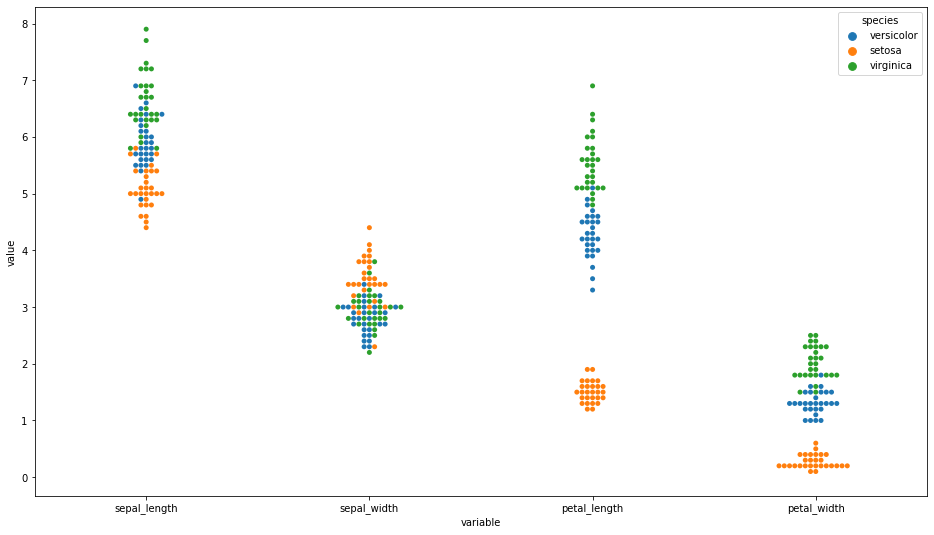

In [11]:
plt.figure(figsize=(16,9))
sns.swarmplot(data=train_numeric_vars_melted, x='variable', y='value', hue='species')

**Takeaways**

### 3. Create 4 subplots (2 rows x 2 columns) of scatterplots.
* sepal_length x sepal_width
* petal_length x petal_width
* sepal_area x petal_area
* sepal_length x petal_length

In [12]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_setosa,species_versicolor,species_virginica
79,5.7,2.6,3.5,1.0,versicolor,0,1,0
36,5.5,3.5,1.3,0.2,setosa,1,0,0
133,6.3,2.8,5.1,1.5,virginica,0,0,1
95,5.7,3.0,4.2,1.2,versicolor,0,1,0
18,5.7,3.8,1.7,0.3,setosa,1,0,0


In [13]:
# Create new columns to hold sepal_area and petal_area

train['sepal_area'] = train.sepal_length * train.sepal_width
train['petal_area'] = train.petal_length * train.petal_width
train.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species,species_setosa,species_versicolor,species_virginica,sepal_area,petal_area
74,6.4,2.9,4.3,1.3,versicolor,0,1,0,18.56,5.59
145,6.7,3.0,5.2,2.3,virginica,0,0,1,20.10,11.96
36,5.5,3.5,1.3,0.2,setosa,1,0,0,19.25,0.26
40,5.0,3.5,1.3,0.3,setosa,1,0,0,17.50,0.39
31,5.4,3.4,1.5,0.4,setosa,1,0,0,18.36,0.60


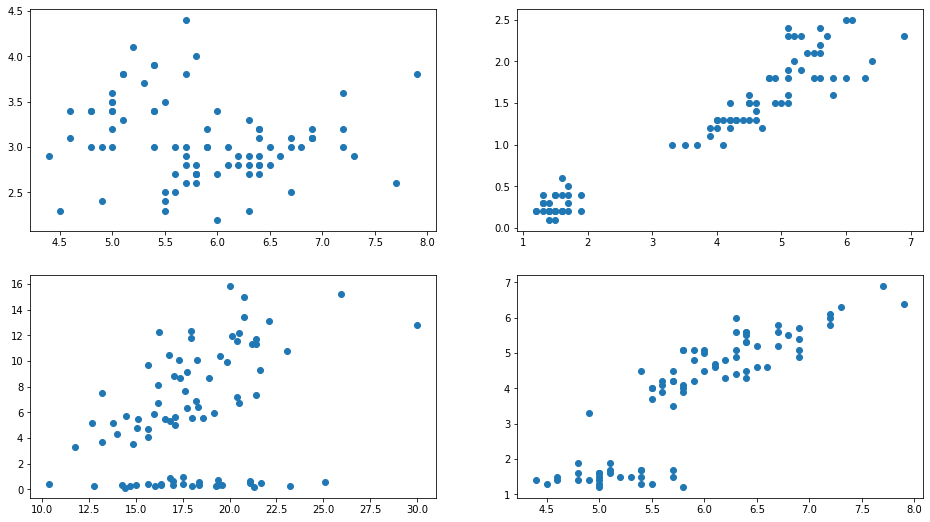

In [24]:
plt.figure(figsize=(16,9))

plt.subplot(2, 2, 1)
plt.scatter(x=train['sepal_length'], y=train['sepal_width'])


plt.subplot(2, 2, 2)
plt.scatter(x=train['petal_length'], y=train['petal_width'])

plt.subplot(2, 2, 3)
plt.scatter(x=train['sepal_area'], y=train['petal_area'])

plt.subplot(2, 2, 4)
plt.scatter(x=train['sepal_length'], y=train['petal_length'])

### 4. Create a heatmap of each variable layering correlation coefficient on top.